--- Plot 1: Individual Beliefs for a Lemonade Stand ---
This plot shows how three different people might estimate the success of a simple lemonade stand project based on funding.


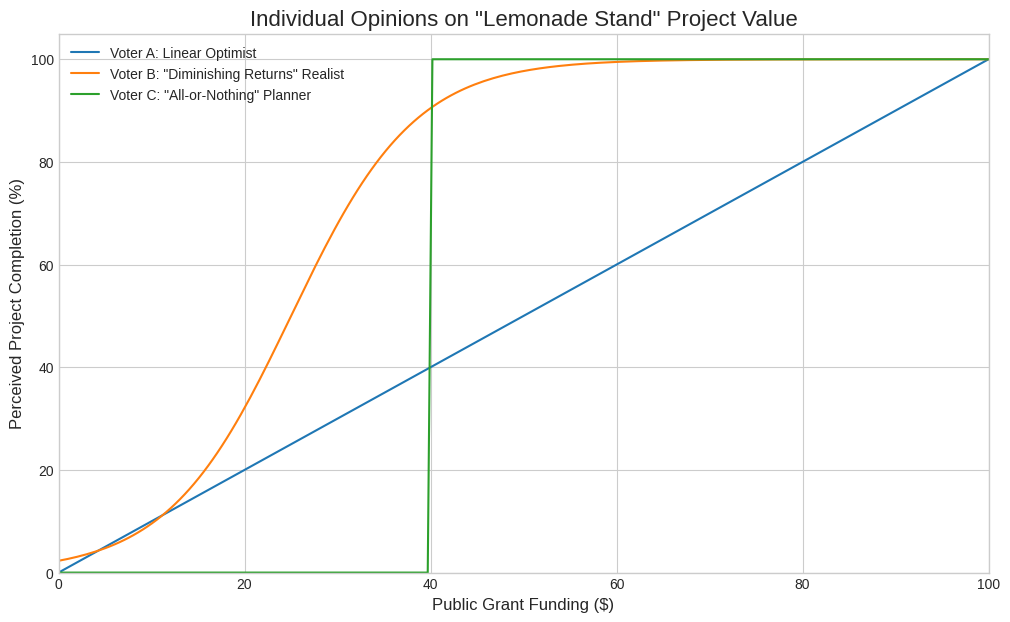



--- Plot 2: The Aggregated 'Wisdom of the Crowd' for the Lemonade Stand ---
By averaging the individual beliefs, we create a single curve representing the collective estimate. The steepest part of this curve shows where funding is most impactful.


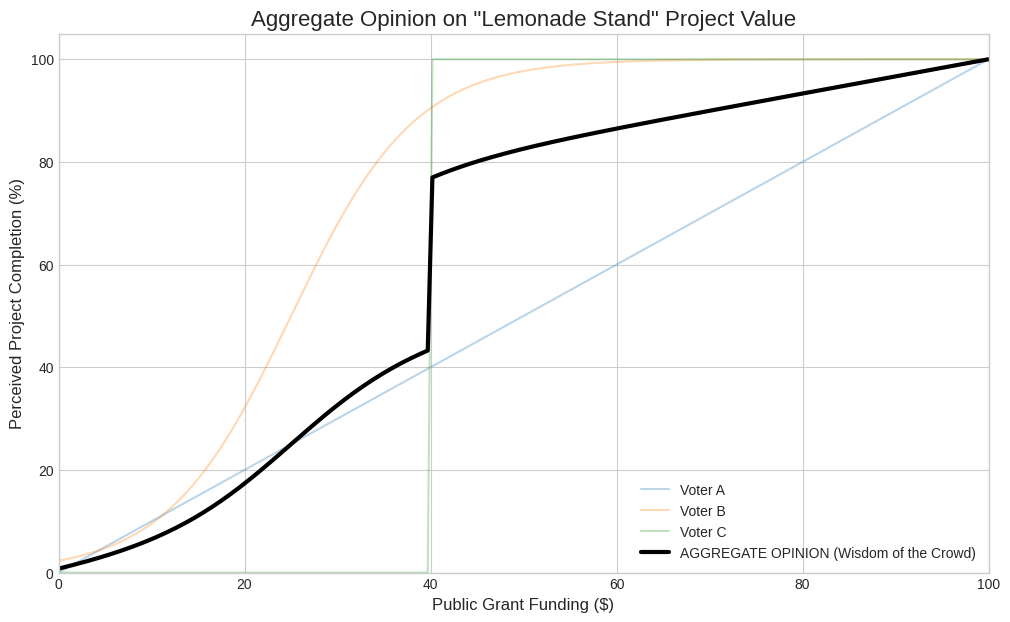



--- Plot 3: Applying the Same Method to a High-Cost 'Rocket to Space' Project ---
This shows the versatility of the method. For a complex, high-cost project, the opinions and the resulting aggregate curve look completely different, guiding funding decisions at a much larger scale.


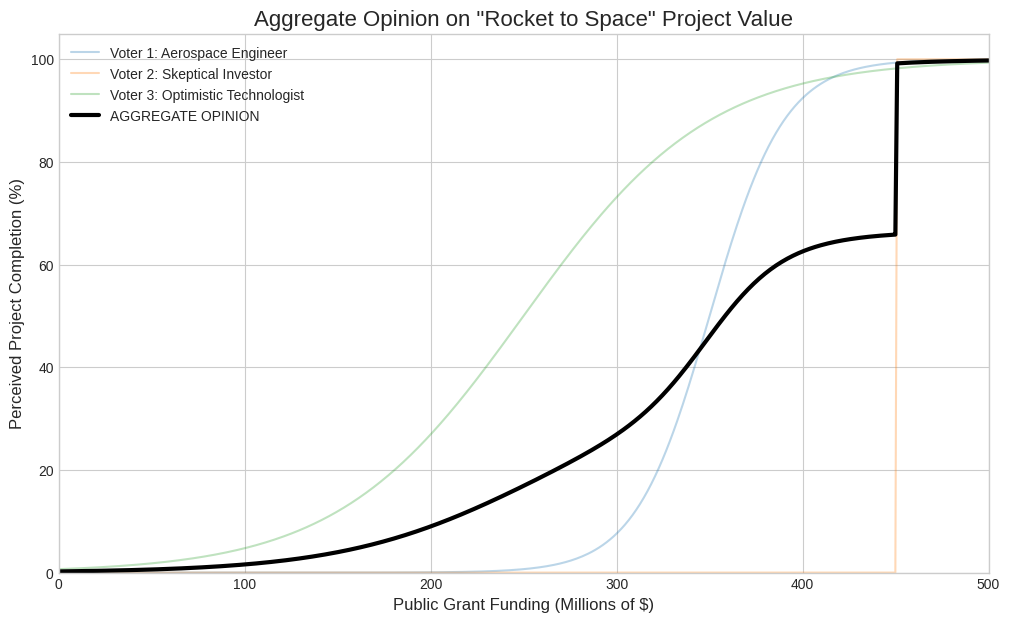

In [ ]:
# ==============================================================================
# A Method for Funding Allocation Using Aggregated Value Curves
#
# This script demonstrates a method for using collective intelligence to
# estimate the value of incremental funding for public projects.
#
# The process involves:
# 1. Asking individuals to draw a graph representing their belief about how
#    project completion (%) increases with funding ($).
# 2. Aggregating these individual graphs into a single "wisdom of the crowd" curve.
# 3. Using the slope of the aggregate curve to identify where funding is most effective.
#
# This single cell will generate three plots to explain the concept.
# ==============================================================================

# --- Step 1: Import Libraries and Set Plot Style ---
import matplotlib.pyplot as plt
import numpy as np

# Use a professional and clean style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# ==============================================================================
# PLOT 1: Individual Opinions on a "Lemonade Stand" Project
# ==============================================================================

print("--- Plot 1: Individual Beliefs for a Lemonade Stand ---")
print("This plot shows how three different people might estimate the success of a simple lemonade stand project based on funding.")

# --- Data for the Lemonade Stand (Low-cost project) ---

# X-axis: Funding in dollars from $0 to $100
x_funding_lemonade = np.linspace(0, 100, 200)

# --- Define three different "voter" opinions ---

# Voter A (The Linear Optimist): Believes every dollar adds a proportional amount of value.
# y = x. For every dollar, you get 1% of the way there.
y_voter_A = x_funding_lemonade

# Voter B (The "Diminishing Returns" Realist): Believes the first few dollars are critical,
# but later dollars have less impact. This is modeled with a sigmoid (S-curve) function.
k_sigmoid = 0.15  # Steepness of the curve
x0_midpoint = 25  # The midpoint of the rapid growth phase ($25)
y_voter_B = 100 / (1 + np.exp(-k_sigmoid * (x_funding_lemonade - x0_midpoint)))

# Voter C (The "All-or-Nothing" Planner): Believes the project is useless until a critical
# threshold is met ($40). This is modeled with a step function.
y_voter_C = np.zeros_like(x_funding_lemonade)  # Start with all zeros
y_voter_C[x_funding_lemonade >= 40] = 100       # Set to 100% after the $40 threshold

# --- Plotting the Individual Opinions ---
fig1, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(x_funding_lemonade, y_voter_A, label='Voter A: Linear Optimist')
ax1.plot(x_funding_lemonade, y_voter_B, label='Voter B: "Diminishing Returns" Realist')
ax1.plot(x_funding_lemonade, y_voter_C, label='Voter C: "All-or-Nothing" Planner')

ax1.set_title('Individual Opinions on "Lemonade Stand" Project Value', fontsize=16)
ax1.set_xlabel('Public Grant Funding ($)', fontsize=12)
ax1.set_ylabel('Perceived Project Completion (%)', fontsize=12)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 105)
ax1.legend()
ax1.grid(True)

plt.show()


# ==============================================================================
# PLOT 2: Aggregated Opinion on the "Lemonade Stand" Project
# ==============================================================================

print("\n\n--- Plot 2: The Aggregated 'Wisdom of the Crowd' for the Lemonade Stand ---")
print("By averaging the individual beliefs, we create a single curve representing the collective estimate. The steepest part of this curve shows where funding is most impactful.")

# --- Aggregating the Data ---
# We stack the 3 opinions into a single 2D array
all_opinions_lemonade = np.vstack([y_voter_A, y_voter_B, y_voter_C])

# We calculate the mean down the columns (axis=0) to get the average opinion at each funding point
y_aggregate_lemonade = np.mean(all_opinions_lemonade, axis=0)

# --- Plotting the Aggregate Opinion ---
fig2, ax2 = plt.subplots(figsize=(12, 7))

# Plot the individual opinions with transparency (alpha) to show where the aggregate comes from
ax2.plot(x_funding_lemonade, y_voter_A, label='Voter A', alpha=0.3)
ax2.plot(x_funding_lemonade, y_voter_B, label='Voter B', alpha=0.3)
ax2.plot(x_funding_lemonade, y_voter_C, label='Voter C', alpha=0.3)

# Plot the aggregate opinion with a bold, dark line to emphasize it
ax2.plot(x_funding_lemonade, y_aggregate_lemonade, label='AGGREGATE OPINION (Wisdom of the Crowd)', color='black', linewidth=3)

ax2.set_title('Aggregate Opinion on "Lemonade Stand" Project Value', fontsize=16)
ax2.set_xlabel('Public Grant Funding ($)', fontsize=12)
ax2.set_ylabel('Perceived Project Completion (%)', fontsize=12)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 105)
ax2.legend()
ax2.grid(True)

plt.show()


# ==============================================================================
# PLOT 3: Applying the Method to a "Rocket to Space" Project
# ==============================================================================

print("\n\n--- Plot 3: Applying the Same Method to a High-Cost 'Rocket to Space' Project ---")
print("This shows the versatility of the method. For a complex, high-cost project, the opinions and the resulting aggregate curve look completely different, guiding funding decisions at a much larger scale.")


# --- Data for the Rocket to Space Project (High-cost project) ---
# X-axis: Funding in Millions of Dollars, from $0M to $500M
x_funding_rocket = np.linspace(0, 500, 500)

# --- Define three different "voter" opinions for the rocket ---
# Voter 1 (Aerospace Engineer): Believes progress is slow, then rapid once major components
# are built, requiring huge initial investment. A very steep S-curve.
k_rocket = 0.05
x0_rocket = 350  # Midpoint is at $350M
y_voter_1 = 100 / (1 + np.exp(-k_rocket * (x_funding_rocket - x0_rocket)))

# Voter 2 (Skeptical Investor): Believes it's a total failure until a huge sum is secured.
# A very late step function.
y_voter_2 = np.zeros_like(x_funding_rocket)
y_voter_2[x_funding_rocket >= 450] = 100  # Needs $450M to even have a chance

# Voter 3 (Optimistic Technologist): Believes key milestones can be hit along the way,
# creating value even if the final launch fails (e.g., new engine tech). A more gradual S-curve.
k_optimist = 0.02
x0_optimist = 250
y_voter_3 = 100 / (1 + np.exp(-k_optimist * (x_funding_rocket - x0_optimist)))

# --- Aggregating and Plotting for the Rocket ---
all_opinions_rocket = np.vstack([y_voter_1, y_voter_2, y_voter_3])
y_aggregate_rocket = np.mean(all_opinions_rocket, axis=0)

fig3, ax3 = plt.subplots(figsize=(12, 7))

# Plot individual opinions with transparency
ax3.plot(x_funding_rocket, y_voter_1, label='Voter 1: Aerospace Engineer', alpha=0.3)
ax3.plot(x_funding_rocket, y_voter_2, label='Voter 2: Skeptical Investor', alpha=0.3)
ax3.plot(x_funding_rocket, y_voter_3, label='Voter 3: Optimistic Technologist', alpha=0.3)

# Plot the aggregate opinion with a bold line
ax3.plot(x_funding_rocket, y_aggregate_rocket, label='AGGREGATE OPINION', color='black', linewidth=3)

ax3.set_title('Aggregate Opinion on "Rocket to Space" Project Value', fontsize=16)
ax3.set_xlabel('Public Grant Funding (Millions of $)', fontsize=12)
ax3.set_ylabel('Perceived Project Completion (%)', fontsize=12)
ax3.set_xlim(0, 500)
ax3.set_ylim(0, 105)
ax3.legend()
ax3.grid(True)

plt.show()
